In [1]:
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from scipy import misc


In [2]:
(X_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train / 255

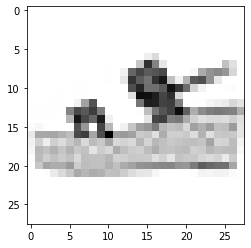

In [3]:
image = X_train[12]

#image = misc.ascent()
plt.imshow(image, cmap="Greys", interpolation="nearest");

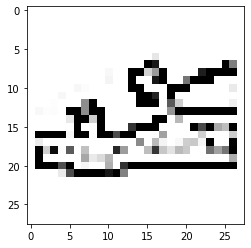

In [4]:
# EDGE DETECTION
filter_mat = np.ones((3, 3)) * -1
filter_mat[1, 1] = 8

#Sharpen
#filter_mat = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
weight  = 1
if int(np.sum(filter_mat)) not in [0, 1]:
    weight = np.sum(filter_mat)
new_image = np.zeros_like(image)

for i in range(1, new_image.shape[0]-1):
    for j in range(1, new_image.shape[0]-1):
        new_image[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * filter_mat * weight)

new_image[new_image < 0] = 0.0
new_image[new_image >= 1] = 1.0

plt.imshow(new_image, cmap="Greys");

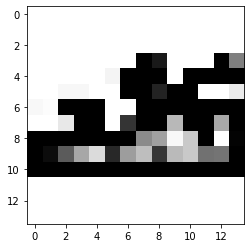

In [5]:
# Do pooling

final_image = np.zeros((int(new_image.shape[0]/2), int(new_image.shape[1]/ 2)))

for i in range(0, new_image.shape[0], 2):
    for j in range(0, new_image.shape[1], 2):
        final_image[int(i/2), int(j/2)] = np.max([new_image[i, j], new_image[i+1, j], new_image[i, j+1], new_image[i+1, j+1]])
plt.imshow(final_image, cmap="Greys");